# 04 - Modelos Causais Gráficos


## Refletindo sobre a Causalidade

Já percebeu como os cozinheiros nos vídeos do YouTube são excelentes ao descrever alimentos? "Reduza o molho até atingir uma consistência aveludada". Se você está apenas aprendendo a cozinhar, não tem ideia do que isso significa. Apenas me diga por quanto tempo devo deixar essa coisa no fogão! Com a causalidade, é a mesma coisa. Suponha que você entre em um bar e ouça pessoas discutindo causalidade (provavelmente um bar ao lado de um departamento de economia). Nesse caso, você ouvirá dizerem como o confundimento de renda tornou desafiador identificar o efeito da imigração naquele bairro, então eles tiveram que usar uma variável instrumental. E agora, talvez você não entenda sobre o que estão falando. Mas vou resolver pelo menos parte desse problema agora.

Modelos gráficos são a linguagem da causalidade. Não são apenas o que você usa para conversar com outros aficcionados corajosos e verdadeiros da causalidade, mas também algo que você utiliza para tornar seus próprios pensamentos mais transparentes.

Como ponto de partida, vamos considerar a independência condicional dos resultados potenciais, por exemplo. Esta é uma das principais suposições que exigimos que seja verdadeira ao realizar inferência causal:

$
(Y_0, Y_1) \perp T | X
$

A independência condicional torna possível medir um efeito no resultado exclusivamente devido ao tratamento e não a qualquer outra variável que esteja presente. Um exemplo clássico é o efeito de um medicamento em um paciente doente. Se apenas pacientes gravemente enfermos recebem o medicamento, pode até parecer que dar a medicação diminui a saúde dos pacientes. Isso ocorre porque o efeito da gravidade se mistura com o efeito do medicamento. Se dividirmos os pacientes em casos graves e não graves e analisarmos o impacto do medicamento em cada subgrupo, obteremos uma imagem mais clara do efeito real. Essa divisão da população por suas características é o que chamamos de controle ou condicionamento em relação a X. Ao condicionar os casos graves, o mecanismo de tratamento torna-se tão bom quanto aleatório. Os pacientes dentro do grupo grave podem ou não receber o medicamento apenas por acaso, não mais devido a uma gravidade elevada, uma vez que todos os pacientes são iguais nessa dimensão. E se o tratamento for atribuído aleatoriamente dentro dos grupos, o tratamento torna-se condicionalmente independente dos resultados potenciais.

Independência e independência condicional são centrais para a inferência causal. No entanto, pode ser bastante desafiador compreendê-las. Mas isso pode mudar se usarmos a linguagem correta para descrever esse problema. É aí que entram os **modelos gráficos causais**. Um modelo gráfico causal é uma maneira de representar como a causalidade funciona em termos do que causa o quê.

Um modelo gráfico parece com isso:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

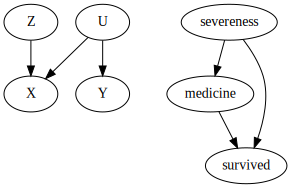

In [2]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

Cada nó representa uma variável aleatória. Utilizamos setas, ou arestas, para mostrar se uma variável causa outra. No primeiro modelo gráfico acima, estamos afirmando que Z causa X e que U causa X e Y. Para fornecer um exemplo mais concreto, podemos traduzir nossos pensamentos sobre o impacto do medicamento na sobrevivência do paciente no segundo gráfico acima. A gravidade causa tanto o medicamento quanto a sobrevivência, e o medicamento também causa a sobrevivência. Como veremos, essa linguagem de modelos gráficos causais nos ajudará a tornar nosso pensamento sobre causalidade mais claro, pois esclarece nossas crenças sobre como o mundo funciona.

## Curso Rápido em Modelos Gráficos

Existem [cursos inteiros sobre modelos gráficos](https://www.coursera.org/specializations/probabilistic-graphical-models). No entanto, para nosso propósito, é apenas (muito) importante que compreendamos que tipo de independência e condição de independência um modelo gráfico implica. Como veremos, a independência flui através de um modelo gráfico como a água flui por um riacho. Podemos interromper esse fluxo ou habilitá-lo, dependendo de como tratamos as variáveis nele. Para entender isso, examinemos algumas estruturas e exemplos gráficos comuns. Eles serão bastante diretos, mas são blocos de construção suficientes para entender tudo sobre independência e independência condicional em modelos gráficos.

Primeiro, observe este gráfico muito simples. A causa B, B causa C. Ou X causa Y, que causa Z.

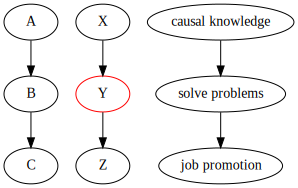

In [3]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

No primeiro gráfico, a dependência flui na direção das setas. Observe que a dependência é simétrica, embora seja um pouco menos intuitiva. Para dar um exemplo mais concreto, digamos que saber sobre inferência causal seja a única maneira de resolver problemas de negócios, e resolver esses problemas seja a única maneira de obter uma promoção no trabalho. Assim, o conhecimento causal implica resolver questões que causam uma promoção. Podemos dizer aqui que a promoção no trabalho depende do conhecimento causal. Quanto maior a expertise causal, maior a chance de obter uma promoção. Além disso, quanto maior a chance de promoção, maior a chance de ter conhecimento causal. Caso contrário, seria difícil conseguir uma promoção.

Agora, digamos que eu condicione a variável intermediária. Nesse caso, a dependência é bloqueada. Portanto, X e Z são independentes dados Y. No gráfico acima, o vermelho indica que Y é uma variável condicionada. Da mesma forma, em nosso exemplo, se eu souber que você é bom em resolver problemas, saber que você entende de inferência causal não fornece nenhuma informação adicional sobre suas chances de obter uma promoção no trabalho. Em termos matemáticos, $E[Promoção|Resolver \ problemas, Conhecimento \ causal]=E[Promoção|Resolver \ problemas]$. O inverso também é verdadeiro; uma vez que eu saiba quão bom você é em resolver problemas, saber sobre seu status de promoção no trabalho não me dá informações adicionais sobre quão provável é que você saiba inferência causal.

Como regra geral, o fluxo de dependência no caminho direto de A para C é bloqueado quando condicionamos uma variável intermediária B. Ou

$A \not \perp C$

e

$
A \perp C | B
$

Agora, vamos considerar uma estrutura de bifurcação. A mesma variável causa duas outras variáveis abaixo do gráfico. Neste caso, a dependência flui para trás através das setas, e temos um **caminho reverso** *(backdoor path)*. Podemos fechar o caminho reverso e interromper a dependência condicionando a causa comum.

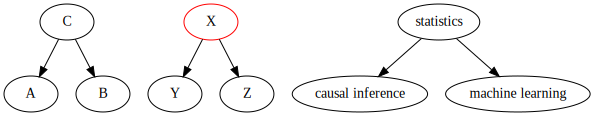

In [4]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

Por exemplo, digamos que seu conhecimento em estatística faz com que você saiba mais sobre inferência causal e aprendizado de máquina. Se eu não souber o seu nível de conhecimento estatístico, então saber que você é bom em inferência causal torna mais provável que você também seja bom em aprendizado de máquina. Isso ocorre porque mesmo que eu não saiba o seu nível de conhecimento estatístico, posso inferi-lo do seu conhecimento em inferência causal. Se você é bom em inferência causal, provavelmente é bom em estatística, tornando mais provável que você seja bom em aprendizado de máquina.

Agora, se eu condicionar o seu conhecimento em estatística, então o quanto você sabe sobre aprendizado de máquina se torna independente de quanto você sabe sobre inferência causal. Saber o seu nível de estatística já me fornece todas as informações necessárias para inferir o nível das suas habilidades em aprendizado de máquina. Veja, conhecer o seu nível em inferência causal não fornecerá mais informações neste caso.

Como regra geral, duas variáveis que compartilham uma causa comum são dependentes, mas independentes quando condicionamos a causa comum. Ou

$A \not \perp  B$

e

$
A \perp B | C
$

A única estrutura que falta é o colisor *(collider)*. Um colisor ocorre quando duas setas colidem em uma única variável. Podemos dizer que, neste caso, ambas as variáveis compartilham um efeito comum.

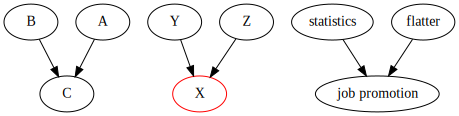

In [5]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

Por exemplo, considere que existem duas maneiras de obter uma promoção no trabalho. Você pode ser bom em estatística ou bajular seu chefe. Se eu não condicionar a sua promoção no trabalho, ou seja, se eu não souber se você a receberá ou não, então o seu nível de estatística e bajulação são independentes. Em outras palavras, saber quão bom você é em estatística não me diz nada sobre quão bom você é em bajular seu chefe. Por outro lado, se você recebeu uma promoção no trabalho, de repente, saber seu nível de estatística me diz algo sobre seu nível de bajulação. Se você é ruim em estatística e recebeu uma promoção, é provável que você saiba como bajular. Caso contrário, você não teria conseguido a promoção. Inversamente, se você é ruim em bajulação, deve ser o caso de que você é bom em estatística. Esse fenômeno é às vezes chamado de **explicação total** *(explaining away)*, porque uma causa já explica o efeito, tornando a outra causa menos provável.

Como regra geral, condicionar em um colisor abre o caminho de dependência. Não condicionar o deixa fechado. Ou

$A \perp B$

e

$
A \not \perp B | C
$

Conhecendo as três estruturas, podemos derivar uma regra ainda mais geral. Um caminho é bloqueado se e somente se:
1. Contiver um não colisor que foi condicionado
2. Contiver um colisor que não foi condicionado e não tiver descendentes que foram condicionados.

Aqui está uma tabela de referência sobre como a dependência flui em um gráfico. Eu a retirei de uma [apresentação da Stanford](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf) por Mark Paskin. As setas com linhas nas pontas significam independência, e as setas sem linhas nas pontas significam dependência.

![img](data/img/graph-flow.png)

Como exemplo final, tente identificar algumas relações de independência e dependência no seguinte gráfico causal.
1. Is $D \perp C$?
2. Is $D \perp C| A $ ?
3. Is $D \perp C| G $ ?
4. Is $A \perp F $ ?
5. Is $A \perp F|E $ ?
6. Is $A \perp F|E,C $ ?

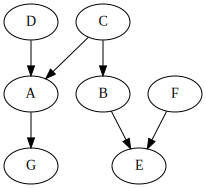

In [6]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**Respostas**:
1. $D \perp C$. Contém um colisor no qual **não** foi condicionado.
2. $D \not\perp C| A $. Contém um colisor no qual foi condicionado.
3. $D \not\perp C| G $. Contém o descendente de um colisor no qual foi condicionado. Você pode ver G como uma espécie de proxy para A aqui.
4. $A \perp F $. Contém um colisor, B->E<-F, no qual **não** foi condicionado.
5. $A \not\perp F|E $. Contém um colisor, B->E<-F, no qual foi condicionado.
6. $A \perp F|E, C $. Contém um colisor, B->E<-F, no qual foi condicionado, mas contém um não colisor no qual foi condicionado. Condicionar em E abre o caminho, mas condicionar em C o fecha novamente.

Entender modelos gráficos causais nos permite compreender os problemas que surgem na inferência causal. Como vimos, o problema sempre se resume ao viés.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

Os modelos gráficos nos permitem diagnosticar qual viés estamos lidando e quais são as ferramentas que precisamos para corrigi-los.

## Viés de Confundimento

![img](./data/img/causal-graph/both_crap.png)

A primeira causa significativa de viés é o confundimento. Isso ocorre quando o tratamento e o resultado compartilham uma causa comum. Por exemplo, suponha que o tratamento seja a educação e o resultado seja a renda. É difícil conhecer o efeito causal da educação nos salários porque ambos compartilham uma causa comum: a inteligência. Assim, poderíamos argumentar que pessoas mais educadas ganham mais dinheiro simplesmente porque são mais inteligentes, e não porque têm mais educação. Precisamos fechar todos os caminhos de retrocesso entre o tratamento e o resultado para identificar o efeito causal. Se fizermos isso, o único efeito que restará será o efeito direto T->Y. Em nosso exemplo, se controlarmos a inteligência, ou seja, compararmos pessoas com o mesmo nível de intelecto, mas diferentes níveis de educação, a diferença no resultado será apenas devido à diferença na escolaridade, uma vez que a inteligência será a mesma para todos. Para corrigir o viés de confundimento, precisamos controlar todas as causas comuns entre o tratamento e o resultado.

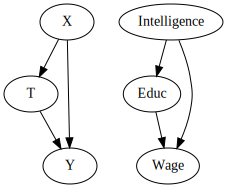

In [7]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

Infelizmente, nem sempre é possível controlar todas as causas comuns. Às vezes, existem causas desconhecidas ou causas conhecidas que não conseguimos medir. O caso da inteligência é um exemplo desta última situação. Apesar de todos os esforços, os cientistas ainda não descobriram como medir bem a inteligência. Vou usar U para denotar variáveis não medidas aqui. Agora, suponha por um momento que a inteligência não possa afetar sua educação diretamente. Ela afeta o desempenho no SAT, mas o SAT determina seu nível de escolaridade, já que abre a possibilidade de ingressar em uma boa faculdade. Mesmo que não possamos controlar a inteligência inobservável, podemos controlar o SAT e fechar esse caminho de retrocesso.

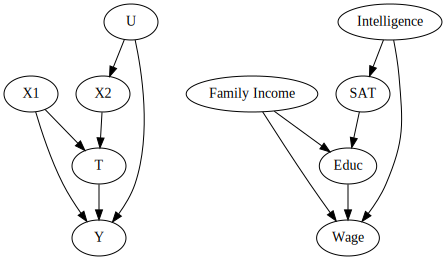

In [8]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

No gráfico a seguir, condicionar em X1 e X2, ou SAT e renda familiar, é suficiente para fechar todos os caminhos de retrocesso entre o tratamento e o resultado. Em outras palavras, $(Y_0, Y_1) \perp T | X1, X2$. Portanto, mesmo que não possamos medir todas as causas comuns, ainda podemos obter independência condicional se controlarmos variáveis mensuráveis que medeiam o efeito das não mensuráveis sobre o tratamento. Uma observação rápida, também temos $(Y_0, Y_1) \perp T | X1, U$, mas como não podemos observar U, não podemos condicionar sobre ele.

Mas e se esse não for o caso? E se a variável não mensurada causar o tratamento e o resultado diretamente? No exemplo a seguir, a inteligência agora causa educação e renda. Portanto, há confusão na relação entre o tratamento (educação) e o resultado (salário). Neste caso, não podemos controlar o confundidor porque ele é inobservável. No entanto, temos outras variáveis mensuradas que podem atuar como uma proxy para o confundidor. Essas variáveis não estão no caminho de retrocesso, mas controlar por elas ajudará a reduzir o viés (embora não o elimine). Essas variáveis são às vezes chamadas de confundidores substitutos.

Em nosso exemplo, não podemos medir a inteligência, mas podemos medir algumas de suas causas, como a educação do pai e da mãe, e alguns de seus efeitos, como o QI ou a pontuação no SAT. Controlar essas variáveis substitutas não é suficiente para eliminar o viés, mas ajuda.

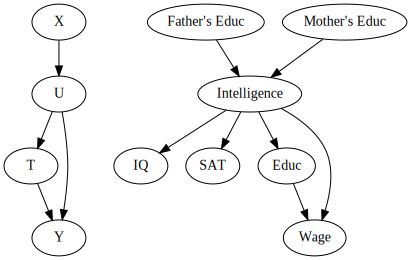

In [9]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g

## Viés de Seleção

Você pode pensar que é uma boa ideia adicionar tudo o que você pode medir ao seu modelo apenas para garantir que não tenha viés de confundimento. Bem, pense de novo.

![image.png](./data/img/causal-graph/selection_bias.png)

A segunda fonte significativa de viés é o que chamaremos de viés de seleção. Aqui, eu acho que a distinção entre esse víes e o viés de confundimento é construtiva, então vou mantê-la. Se o viés de confundimento ocorre quando não controlamos uma causa comum, o viés de seleção está mais relacionado aos efeitos. Um aviso aqui, os economistas tendem a se referir a todos os tipos de viés como viés de seleção.

Frequentemente, o viés de seleção surge quando controlamos mais variáveis do que deveríamos. Pode ser o caso de que o tratamento e o resultado potencial sejam marginalmente independentes, mas se tornem dependentes quando condicionamos em um colisor.

Imagine que, com a ajuda de algum milagre, você finalmente possa randomizar a educação para medir seu efeito nos salários. Mas só para ter certeza de que você não terá confundimento, você controla muitas variáveis. Entre elas, você controla os investimentos. Mas o investimento não é uma causa comum de educação e salário. Em vez disso, é uma consequência de ambos. Pessoas mais educadas ganham mais e investem mais. Além disso, aqueles que ganham mais investem mais. Como o investimento é um colisor, ao condicionar sobre ele, você está abrindo um segundo caminho entre o tratamento e o resultado, o que tornará mais difícil medir o efeito direto. Uma maneira de pensar sobre isso é que, ao controlar os investimentos, você está analisando pequenos grupos da população onde o investimento é o mesmo e, em seguida, encontra o efeito da educação nesses grupos. Mas ao fazer isso, você também está indireta e inadvertidamente não permitindo que os salários mudem muito. Como resultado, você não poderá ver como a educação muda os salários porque não está permitindo que os salários mudem como deveriam.

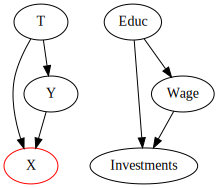

In [10]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

Imagine que investimentos e educação assumam apenas 2 valores para demonstrar por que isso ocorre. Se as pessoas investem ou não. Elas são educadas ou não. Inicialmente, quando não controlamos os investimentos, o termo de viés é zero: $E[Y_0|T=1] - E[Y_0|T=0] = 0$ porque a educação foi randomizada. Isso significa que o salário que as pessoas teriam se não recebessem educação $Salário_0$ é o mesmo se elas recebem ou não o tratamento de educação. Mas o que acontece se condicionarmos os investimentos?

Ao olharmos para aqueles que investem, provavelmente temos o caso de que $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$. Em outras palavras, entre aqueles que investem, os que conseguem fazer isso mesmo sem educação têm mais probabilidade de obter altos rendimentos, independentemente de seu nível de educação. Por esse motivo, o salário que essas pessoas têm, $Salário_0|T=0$, provavelmente é mais alto do que o salário que o grupo educado teria se não tivesse educação, $Salário_0|T=1$. Um raciocínio semelhante pode ser aplicado àqueles que não investem, onde também provavelmente temos $E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]$. Aqueles que não investem mesmo com educação provavelmente teriam um salário mais baixo se não tivessem obtido educação, em comparação com aqueles que não investiram e não tiveram educação.

Para usar um argumento puramente gráfico, se alguém investe, saber que eles têm alta educação explica a segunda causa, que é o salário. Condicionado aos investimentos, uma educação mais alta está associada a salários mais baixos e temos um viés negativo $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$.

Como uma nota adicional, tudo isso que discutimos é verdade se condicionarmos qualquer descendente de um efeito comum.

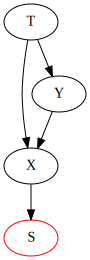

In [11]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

Uma coisa semelhante acontece quando condicionamos um mediador do tratamento. Um mediador é uma variável entre o tratamento e o resultado. Ele, bem, media o efeito causal. Por exemplo, suponha novamente que você pode randomizar a educação. Mas, apenas para ter certeza, você decide controlar se a pessoa teve ou não um emprego executivo *(white collar)*. Mais uma vez, esse condicionamento enviesa a estimativa do efeito causal. Desta vez, não porque abre um caminho pela porta da frente com um colisor, mas porque fecha um dos canais pelos quais o tratamento opera. Em nosso exemplo, conseguir um emprego de escritório é mais uma maneira pela qual mais educação leva a salários mais altos. Ao controlá-lo, fechamos esse canal e deixamos aberto apenas o efeito direto da educação sobre os salários.

*Nota de tradução: "White collar" refere-se a trabalhadores que desempenham funções administrativas/executivas de escritório, onde geralmente envolve trabalho intelectual. Diferenciam-se de "blue collar" que refere-se a trabalhadores que desempenham empregos manuais ou industriais. A melhor tradução que pude encontrar para White collar foi 'emprego executivo'.*

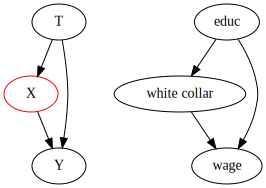

In [12]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g

Para dar um argumento de resultado potencial, sabemos que, devido à randomização, o viés é zero $E[Y_0|T=0] - E[Y_0|T=1] = 0$. No entanto, se condicionarmos os indivíduos com empregos executivos, temos que $E[Y_0|T=0, CB=1] > E[Y_0|T=1, CB=1]$. Isso ocorre porque aqueles que conseguem um emprego executivo, mesmo sem educação, provavelmente são mais trabalhadores do que aqueles que precisam da ajuda da educação para conseguir o mesmo emprego. Com o mesmo raciocínio, $E[Y_0|T=0, CB=0] > E[Y_0|T=1, CB=0]$, porque aqueles que não conseguiram um emprego executivo, mesmo com educação, provavelmente são menos trabalhadores do que aqueles que não conseguiram, mas também não tiveram nenhuma educação.

Em nosso caso, condicionar sobre o mediador induz um viés negativo. Isso faz com que o efeito da educação pareça menor do que realmente é. Isso ocorre porque o efeito causal é positivo. Se o efeito fosse negativo, condicionar sobre um mediador teria um viés positivo. Em todos os casos, esse tipo de condicionamento faz com que o efeito pareça mais fraco do que é.

Para colocar de maneira mais prosaica, suponha que você precise escolher entre dois candidatos para um emprego em sua empresa. Ambos têm conquistas profissionais igualmente impressionantes, mas um não tem um diploma de ensino superior. Qual deles você deveria escolher? Claro, você deveria escolher aquele sem educação superior, porque ele conseguiu alcançar as mesmas coisas que o outro, mas com as probabilidades contra si.

![image.png](./data/img/causal-graph/three_bias.png)

## Conceitos-chave

Estudamos modelos gráficos como uma linguagem para entender e expressar melhor as ideias de causalidade. Fizemos um resumo rápido das regras de independência condicional em um gráfico. Isso nos ajudou a explorar três estruturas que podem levar a viés.

A primeira foi o confundimento, que ocorre quando o tratamento e o resultado têm uma causa comum que não consideramos ou controlamos. A segunda é o viés de seleção devido à condicionamento em um efeito comum. A terceira estrutura também é uma forma de viés de seleção, desta vez devido ao controle excessivo de variáveis mediadoras. Esse controle excessivo pode levar a viés mesmo que o tratamento tenha sido atribuído aleatoriamente. O viés de seleção muitas vezes pode ser corrigido simplesmente não fazendo nada, por isso é perigoso. Como tendemos a ter viés em favor da ação, costumamos ver ideias que controlam coisas como inteligentes, quando podem estar causando mais mal do que bem.

## Referências

Gosto de pensar nesta série inteira como uma homenagem a Joshua Angrist, Alberto Abadie e Christopher Walters por sua incrível aula de Econometria. A maioria das ideias aqui foram tiradas de suas aulas na *American Economic Association*. Assisti-las é o que está me mantendo são durante este difícil ano de 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

Também gostaria de referenciar os livros incríveis de Angrist. Eles me mostraram que Econometria, ou 'Métricas, como eles chamam, não é apenas extremamente útil, mas também profundamente divertida.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

Finalmente, gostaria de referenciar o livro de Miguel Hernan e Jamie Robins. Tem sido meu fiel companheiro nas questões mais espinhosas de inferência causal que tive que responder.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

![img](./data/img/poetry.png)

## Contribua

"Inferência Causal para os Corajosos e Verdadeiros" é um material de código aberto sobre inferência causal, a estatística da ciência. Seu objetivo é ser acessível monetariamente e intelectualmente. Ele utiliza apenas software gratuito baseado em Python.
Se você encontrou valor neste livro e deseja apoiá-lo, por favor, vá para o [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). Se você não estiver pronto para contribuir financeiramente, também pode ajudar corrigindo erros, sugerindo edições ou dando feedback sobre trechos que não compreendeu. Acesse o repositório do livro e abra uma issue na [versão em inglês](https://github.com/matheusfacure/python-causality-handbook/issues) ou na [versão em português](https://github.com/rdemarqui/python-causality-handbook-ptbr/issues). Por fim, se você gostou deste conteúdo, compartilhe com outras pessoas que possam achar útil e dê uma estrela no GitHub na [versão em inglês](https://github.com/matheusfacure/python-causality-handbook/stargazers) e na [versão em português](https://github.com/rdemarqui/python-causality-handbook-ptbr/stargazers).

---

<em> <b>Nota de Tradução:</b> O capítulo é originalmente intitulado "Graphical Causal Models", e uma tradução mais precisa poderia ser "Modelos de [Grafos](https://pt.wikipedia.org/wiki/Teoria_dos_grafos) Causais". Ambos os termos são utilizados na literatura. Optei por utilizar a palavra "gráfico" porque, na minha perspectiva, ela confere maior fluidez ao texto. </em>

<div align="center">
<a href="03-Stats-Review-The-Most-Dangerous-Equation.ipynb"><-- Anterior</a>  
<a href="00-Summary.ipynb">| Sumário |</a>  
<a href="05-The-Unreasonable-Effectiveness-of-Linear-Regression.ipynb">Próximo --></a>  
</div>